In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\shrey\OneDrive\Desktop\Datasets\food_coded.csv")
pd.set_option('display.max_columns', None)
df.head()             

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,cook,comfort_food_reasons_coded.1,cuisine,diet_current,diet_current_coded,drink,eating_changes,eating_changes_coded,eating_changes_coded1,eating_out,employment,ethnic_food,exercise,father_education,father_profession,fav_cuisine,fav_cuisine_coded,fav_food,food_childhood,fries,fruit_day,grade_level,greek_food,healthy_feeling,healthy_meal,ideal_diet,ideal_diet_coded,income,indian_food,italian_food,life_rewarding,marital_status,meals_dinner_friend,mother_education,mother_profession,nutritional_check,on_off_campus,parents_cook,pay_meal_out,persian_food,self_perception_weight,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,2.0,9,NaN,eat good and exercise,1,1.0,eat faster,1,1,3,3.0,1,1.0,5.0,profesor,Arabic cuisine,3,1.0,rice and chicken,2,5,2,5,2,looks not oily,being healthy,8,5.0,5,5,1.0,1.0,"rice, chicken, soup",1.0,unemployed,5,1.0,1,2,5.0,3.0,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,3.0,1,1.0,I eat about three times a day with some snacks...,2,2.0,I eat out more than usual.,1,2,2,2.0,4,1.0,2.0,Self employed,Italian,1,1.0,"chicken and biscuits, beef soup, baked beans",1,4,4,4,5,"Grains, Veggies, (more of grains and veggies),...",Try to eat 5-6 small meals a day. While trying...,3,4.0,4,4,1.0,2.0,"Pasta, steak, chicken",4.0,Nurse RN,4,1.0,1,4,4.0,3.0,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,1.0,1,3.0,"toast and fruit for breakfast, salad for lunch...",3,1.0,sometimes choosing to eat fast food instead of...,1,3,2,3.0,5,2.0,2.0,owns business,italian,1,3.0,"mac and cheese, pizza, tacos",1,5,3,5,6,usually includes natural ingredients; nonproce...,i would say my ideal diet is my current diet,6,6.0,5,5,7.0,2.0,"chicken and rice with veggies, pasta, some kin...",2.0,owns business,4,2.0,1,3,5.0,6.0,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,2.0,2,2.0,"College diet, cheap and easy foods most nights...",2,2.0,Accepting cheap and premade/store bought foods,1,3,2,3.0,5,3.0,2.0,Mechanic,Turkish,3,1.0,"Beef stroganoff, tacos, pizza",2,4,4,5,7,"Fresh fruits& vegetables, organic meats","Healthy, fresh veggies/fruits & organic foods",2,6.0,5,5,2.0,2.0,Grilled chicken \rStuffed Shells\rHomemade Chili,4.0,Special Education Teacher,2,1.0,1,2,5.0,5.0,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,1.0,1,2.0,I try to eat healthy but often struggle becaus...,2,2.0,I have eaten generally the same foods but I do...,3,4,2,2.0,4,1.0,4.0,IT,Italian,1,3.0,"Pasta, chicken tender, pizza",1,4,4,4,6,"A lean protein such as grilled chicken, green ...",Ideally I would like to be able to eat healthi...,2,6.0,2,5,1.0,1.0,"Chicken Parmesan, Pulled Pork, Spaghetti and m...",5.0,Substance Abuse Conselor,3,1.0,1,4,2.0,4.0,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [3]:
data = pd.DataFrame(df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']])
data.head()

,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


## Data Exploration and Visualization

<AxesSubplot:xlabel='income', ylabel='count'>

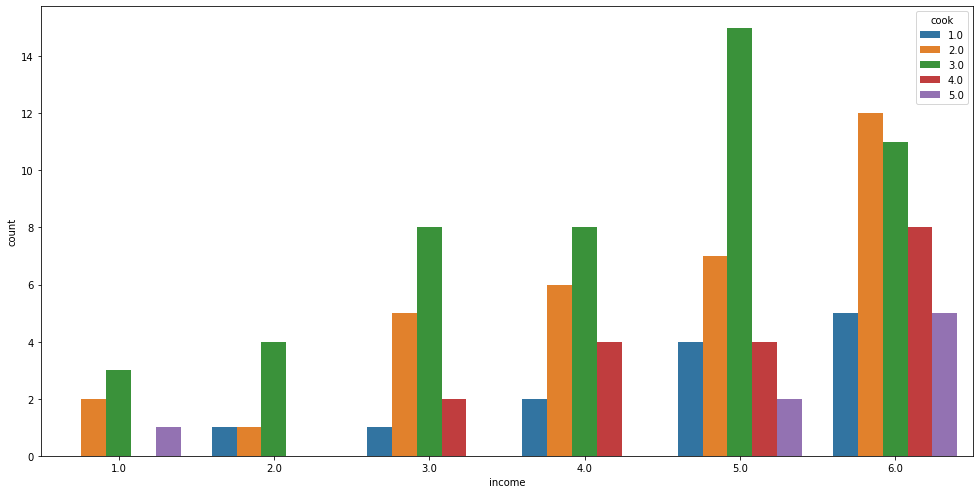

In [4]:
a4_dims = (16.7, 8.27)
fig,ax = plt.subplots(figsize=a4_dims)
sns.countplot(ax=ax, x="income", hue='cook', data=data)

<AxesSubplot:>

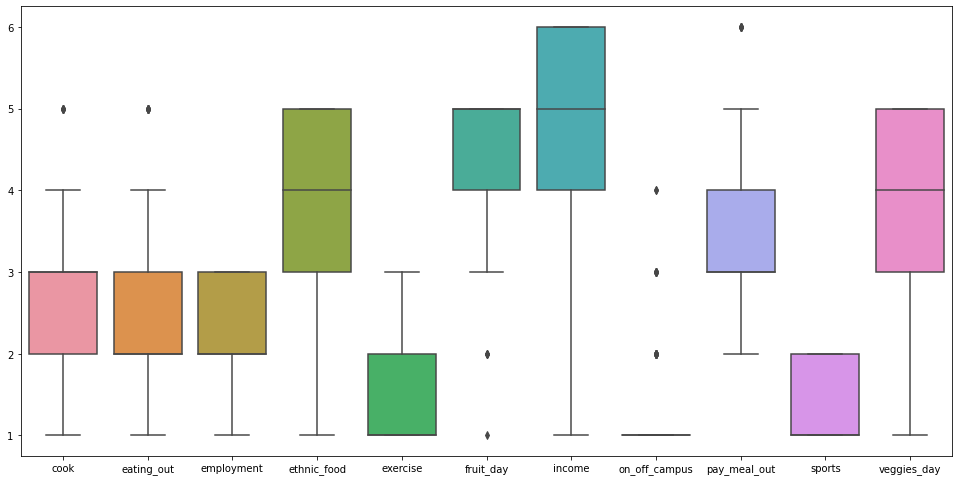

In [5]:
a4_dims = (16.7, 8.27)
fig,ax = plt.subplots(figsize=a4_dims)
boxplot = sns.boxplot(ax=ax, data=data)
boxplot

## Data Preprocessing

In [6]:
data.isnull().sum()

cook              3
eating_out        0
employment        9
ethnic_food       0
exercise         13
fruit_day         0
income            1
on_off_campus     1
pay_meal_out      0
sports            2
veggies_day       0
dtype: int64

In [7]:
data.dropna(subset=['cook','employment','income','on_off_campus','sports'],inplace=True)

In [8]:
data.fillna(data.mean(), inplace=True)
data.isnull().sum()

cook             0
eating_out       0
employment       0
ethnic_food      0
exercise         0
fruit_day        0
income           0
on_off_campus    0
pay_meal_out     0
sports           0
veggies_day      0
dtype: int64

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110 entries, 0 to 123
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   cook           110 non-null    float64
 1   eating_out     110 non-null    int64  
 2   employment     110 non-null    float64
 3   ethnic_food    110 non-null    int64  
 4   exercise       110 non-null    float64
 5   fruit_day      110 non-null    int64  
 6   income         110 non-null    float64
 7   on_off_campus  110 non-null    float64
 8   pay_meal_out   110 non-null    int64  
 9   sports         110 non-null    float64
 10  veggies_day    110 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 10.3 KB


In [10]:
data.reset_index(inplace=True)

## Run KMeans clustering on the data

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)

array([[0.        , 0.25      , 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.00813008, 0.5       , 0.25      , ..., 0.5       , 0.        ,
        0.75      ],
       [0.01626016, 0.        , 0.25      , ..., 0.25      , 1.        ,
        1.        ],
       ...,
       [0.97560976, 0.5       , 0.25      , ..., 0.5       , 0.        ,
        1.        ],
       [0.99186992, 0.5       , 0.5       , ..., 0.5       , 1.        ,
        0.75      ],
       [1.        , 0.5       , 1.        , ..., 0.25      , 1.        ,
        0.5       ]])

In [12]:
k_rng = range(1,11)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data[['income']])
    sse.append(km.inertia_)

<ipython-input-12-c6085e911d92>:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (7). Possibly due to duplicate points in X.
  km.fit(data[['income']])
<ipython-input-12-c6085e911d92>:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (8). Possibly due to duplicate points in X.
  km.fit(data[['income']])
<ipython-input-12-c6085e911d92>:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (9). Possibly due to duplicate points in X.
  km.fit(data[['income']])
<ipython-input-12-c6085e911d92>:5: ConvergenceWarning: Number of distinct clusters (6) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  km.fit(data[['income']])


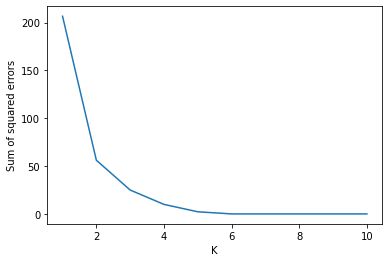

In [13]:
plt.xlabel('K')
plt.ylabel('Sum of squared errors')
plt.plot(k_rng, sse)

In [14]:
km = KMeans(n_clusters=6)
label = km.fit_predict(data)

In [15]:
data['cluster'] = label
data

,index,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day,cluster
0,0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5,4
1,1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4,4
2,2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5,4
3,3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3,4
4,4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,118,3.0,2,2.0,4,2.0,5,3.0,3.0,4,2.0,5,1
106,119,2.0,2,2.0,5,2.0,5,2.0,1.0,3,1.0,5,1
107,120,3.0,2,1.0,4,2.0,5,4.0,3.0,4,1.0,5,1
108,122,3.0,3,3.0,5,2.0,4,2.0,1.0,4,2.0,4,1


No handles with labels found to put in legend.


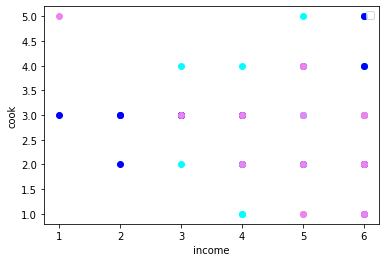

In [16]:
data1 = data[data.cluster == 0]
data2 = data[data.cluster == 1]
data3 = data[data.cluster == 2]


plt.scatter(data1.income, data1['cook'], color = 'cyan')
plt.scatter(data2.income, data2['cook'], color = 'blue')
plt.scatter(data3.income, data3['cook'], color = 'violet')


plt.xlabel('income')
plt.ylabel('cook')
plt.legend()

## Collection of Geolocational Data

In [17]:
from pandas.io.json import json_normalize
import folium
import requests

In [18]:
CLIENT_ID = 'MXCQMXRSJLHKNVCQZZ4DS1PAACFEPHOP1NDDJLFPF5UAZARM' # your Foursquare ID
CLIENT_SECRET = 'P2AEBEC3TFFGLYAQTQWDNCRZQS2XGCQ4D52QADPYAAXHB0VO' # your Foursquare Secret
VERSION = "20210730"                      
# limit of number of venues returned by Foursquare API
LIMIT = 10000 
radius = 30000

In [19]:
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    13.133521,77.567135,
    radius, 
    LIMIT)
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '610541ef20d0b14012947e6d'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 164,
  'suggestedBounds': {'ne': {'lat': 13.40352127000027,
    'lng': 77.84386964188008},
   'sw': {'lat': 12.86352072999973, 'lng': 77.29040035811991}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '54cf2060498e7db4b0f114ab',
       'name': 'Decathlon',
       'location': {'lat': 13.168697398893203,
        'lng': 77.63238890489083,
        'labeledLatLngs': [{'label': 'display',
          'lat': 13.168697398893203,
          'lng': 77.6323889048

In [20]:
venues = results['response']['groups'][0]['items']
nearby_venues = pd.json_normalize(venues)

In [21]:
nearby_venues

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN
1,e-0-4f1869c7e4b0ebf9e4ae9134-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN
2,e-0-531ed995498ef21f6f904159-2,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN
3,e-0-4ba0b3a0f964a520587837e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0b3a0f964a520587837e3,Shri Sagar (Formerly CTR),12.998309,77.569460,"[{'label': 'display', 'lat': 12.99830948570850...",15053,IN,Bangalore,Karnātaka,India,"[#154, Ground Flr (Margosa Road, Malleshwaram)...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],"#154, Ground Flr","Margosa Road, Malleshwaram",NaN,Malleswaram,NaN
4,e-0-4be40cce910020a11725d114-4,0,"[{'summary': 'This spot is popular', 'type': '...",4be40cce910020a11725d114,Corner House,13.028051,77.572970,"[{'label': 'display', 'lat': 13.02805082855679...",11757,IN,Bangalore,Karnātaka,India,"[New BEL Road (80 Feet Road), Bangalore 560094...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],New BEL Road,80 Feet Road,560094,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,e-0-4faba6fde4b0db927cea484c-95,0,"[{'summary': 'This spot is popular', 'type': '...",4faba6fde4b0db927cea484c,Debenhams,13.011302,77.555054,"[{'label': 'display', 'lat': 13.01130224926408...",13668,IN,Bangalore,Karnātaka,India,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...","[{'id': '4bf58dd8d48988d103951735', 'name': 'C...",0,[],Orion Mall,Dr. Rajkumar Road,NaN,NaN,NaN
96,e-0-50b474b8e4b06a00a3ccbf18-96,0,"[{'summary': 'This spot is popular', 'type': '...",50b474b8e4b06a00a3ccbf18,The Hole in the Wall Cafe,12.934609,77.625529,"[{'label': 'display', 'lat': 12.93460904510292...",23030,IN,Bangalore,Karnātaka,India,"[No. 4, 8th Main Rd (Koramangala 4th Block), B...","[{'id': '4bf58dd8d48988d143941735', 'name': 'B...",0,[],"No. 4, 8th Main Rd",Koramangala 4th Block,560034,NaN,NaN
97,e-0-4cd41191d160b1f76d4727ab-97,0,"[{'summary': 'This spot is popular', 'type': '...",4cd41191d160b1f76d4727ab,Karnataka Bhel House,12.959412,77.567264,"[{'label': 'display', 'lat': 12.95941243342079...",19381,IN,Bangalore,Karnātaka,India,"[Betn.3rd & 4th Main (3rd crosd), Bangalore 56...","[{'id': '4bf58dd8d48988d16e941735', 'name': 'F...",0,[],Betn.3rd & 4th Main,3rd crosd,560018,NaN,NaN
98,e-0-4c8a413b6418a1430407dece-98,0,"[{'summary': 'This spot is popular', 'type': '...",4c8a413b6418a1430407dece,Corner House,12.917455,77.593280,"[{'label': 'display', 'lat': 12.91745511116864...",24218,IN,Bangalore,Karnātaka,India,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],"#1225, Near Ragi Gudda Temple","26th Main, 9th Blk, Jayanagar",560069,NaN,NaN


## Categorizing venues according to restuarant density
#### Restaurant: Number of Restaurant in the radius of 20 km
#### others: Number of Gyms, Parks, Grocery stores etc in the radius of 20 km

In [22]:
resta=[]
oth=[]
for lat,long in zip(nearby_venues['venue.location.lat'],nearby_venues['venue.location.lng']):
    url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lat,long,
    1000, 
    100)
    req = requests.get(url).json()
    venue = req['response']['groups'][0]['items']
    nearby_venue = pd.json_normalize(venue)
    df=nearby_venue['venue.categories']
    
    g=[]
    for i in range(0,df.size):
        g.append(df[i][0]['icon']['prefix'].find('food'))
    co=0
    for i in g:
        if i>1:
            co+=1
    resta.append(co)
    oth.append(len(g)-co)

nearby_venues['Restaurant']=resta
nearby_venues['Others']=oth


In [23]:
nearby_venues.head()

,referralId,reasons.count,reasons.items,venue.id,venue.name,venue.location.lat,venue.location.lng,venue.location.labeledLatLngs,venue.location.distance,venue.location.cc,venue.location.city,venue.location.state,venue.location.country,venue.location.formattedAddress,venue.categories,venue.photos.count,venue.photos.groups,venue.location.address,venue.location.crossStreet,venue.location.postalCode,venue.location.neighborhood,venue.venuePage.id,Restaurant,Others
0,e-0-54cf2060498e7db4b0f114ab-0,0,"[{'summary': 'This spot is popular', 'type': '...",54cf2060498e7db4b0f114ab,Decathlon,13.168697,77.632389,"[{'label': 'display', 'lat': 13.16869739889320...",8085,IN,Bangalore,Karnātaka,India,"[Bangalore, Karnātaka, India]","[{'id': '4bf58dd8d48988d115951735', 'name': 'B...",0,[],NaN,NaN,NaN,NaN,NaN,3,2
1,e-0-4f1869c7e4b0ebf9e4ae9134-1,0,"[{'summary': 'This spot is popular', 'type': '...",4f1869c7e4b0ebf9e4ae9134,Orion Mall,13.011313,77.555039,"[{'label': 'display', 'lat': 13.01131324470653...",13667,IN,Bangalore,Karnātaka,India,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...","[{'id': '4bf58dd8d48988d1fd941735', 'name': 'S...",0,[],#26/1,"Dr. Rajkumar Rd, Rajajinagar",560055,NaN,NaN,31,30
2,e-0-531ed995498ef21f6f904159-2,0,"[{'summary': 'This spot is popular', 'type': '...",531ed995498ef21f6f904159,"PVR Gold Class, Orion",13.010923,77.555010,"[{'label': 'display', 'lat': 13.01092312496633...",13710,IN,NaN,NaN,India,[India],"[{'id': '4bf58dd8d48988d180941735', 'name': 'M...",0,[],NaN,NaN,NaN,NaN,NaN,33,30
3,e-0-4ba0b3a0f964a520587837e3-3,0,"[{'summary': 'This spot is popular', 'type': '...",4ba0b3a0f964a520587837e3,Shri Sagar (Formerly CTR),12.998309,77.569460,"[{'label': 'display', 'lat': 12.99830948570850...",15053,IN,Bangalore,Karnātaka,India,"[#154, Ground Flr (Margosa Road, Malleshwaram)...","[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",0,[],"#154, Ground Flr","Margosa Road, Malleshwaram",NaN,Malleswaram,NaN,46,19
4,e-0-4be40cce910020a11725d114-4,0,"[{'summary': 'This spot is popular', 'type': '...",4be40cce910020a11725d114,Corner House,13.028051,77.572970,"[{'label': 'display', 'lat': 13.02805082855679...",11757,IN,Bangalore,Karnātaka,India,"[New BEL Road (80 Feet Road), Bangalore 560094...","[{'id': '4bf58dd8d48988d1c9941735', 'name': 'I...",0,[],New BEL Road,80 Feet Road,560094,NaN,NaN,41,9


In [24]:
n=nearby_venues.drop(['referralId', 'reasons.count', 'reasons.items', 'venue.id',
       'venue.name', 
       'venue.location.labeledLatLngs', 'venue.location.distance',
       'venue.location.cc', 
       'venue.categories', 'venue.photos.count', 'venue.photos.groups',
       'venue.location.crossStreet', 'venue.location.address','venue.location.city',
       'venue.location.state', 'venue.location.crossStreet','venue.location.neighborhood',
       'venue.venuePage.id',
       'venue.location.postalCode','venue.location.country'],axis=1)

In [25]:
n

,venue.location.lat,venue.location.lng,venue.location.formattedAddress,Restaurant,Others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",3,2
1,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",31,30
2,13.010923,77.555010,[India],33,30
3,12.998309,77.569460,"[#154, Ground Flr (Margosa Road, Malleshwaram)...",46,19
4,13.028051,77.572970,"[New BEL Road (80 Feet Road), Bangalore 560094...",41,9
...,...,...,...,...,...
95,13.011302,77.555054,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...",31,30
96,12.934609,77.625529,"[No. 4, 8th Main Rd (Koramangala 4th Block), B...",76,24
97,12.959412,77.567264,"[Betn.3rd & 4th Main (3rd crosd), Bangalore 56...",10,12
98,12.917455,77.593280,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...",57,14


In [26]:
n=n.dropna()
n = n.rename(columns={'venue.location.lat': 'lat', 'venue.location.lng': 'long', 'venue.location.formattedAddress': 'venue.address'})
n

,lat,long,venue.address,Restaurant,Others
0,13.168697,77.632389,"[Bangalore, Karnātaka, India]",3,2
1,13.011313,77.555039,"[#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...",31,30
2,13.010923,77.555010,[India],33,30
3,12.998309,77.569460,"[#154, Ground Flr (Margosa Road, Malleshwaram)...",46,19
4,13.028051,77.572970,"[New BEL Road (80 Feet Road), Bangalore 560094...",41,9
...,...,...,...,...,...
95,13.011302,77.555054,"[Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...",31,30
96,12.934609,77.625529,"[No. 4, 8th Main Rd (Koramangala 4th Block), B...",76,24
97,12.959412,77.567264,"[Betn.3rd & 4th Main (3rd crosd), Bangalore 56...",10,12
98,12.917455,77.593280,"[#1225, Near Ragi Gudda Temple (26th Main, 9th...",57,14


In [27]:
n['venue.address']

0                         [Bangalore, Karnātaka, India]
1     [#26/1 (Dr. Rajkumar Rd, Rajajinagar), Bangalo...
2                                               [India]
3     [#154, Ground Flr (Margosa Road, Malleshwaram)...
4     [New BEL Road (80 Feet Road), Bangalore 560094...
                            ...                        
95    [Orion Mall (Dr. Rajkumar Road), Bangalore, Ka...
96    [No. 4, 8th Main Rd (Koramangala 4th Block), B...
97    [Betn.3rd & 4th Main (3rd crosd), Bangalore 56...
98    [#1225, Near Ragi Gudda Temple (26th Main, 9th...
99    [R R Nagar (Model Road), Bangalore, Karnātaka,...
Name: venue.address, Length: 100, dtype: object

In [28]:
spec_chars = ["[","]"]
for char in spec_chars:
    n['venue.address'] = n['venue.address'].astype(str).str.replace(char, ' ')

In [29]:
n

,lat,long,venue.address,Restaurant,Others
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",3,2
1,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",31,30
2,13.010923,77.555010,'India',33,30
3,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",46,19
4,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",41,9
...,...,...,...,...,...
95,13.011302,77.555054,"'Orion Mall (Dr. Rajkumar Road)', 'Bangalore'...",31,30
96,12.934609,77.625529,"'No. 4, 8th Main Rd (Koramangala 4th Block)',...",76,24
97,12.959412,77.567264,"'Betn.3rd & 4th Main (3rd crosd)', 'Bangalore...",10,12
98,12.917455,77.593280,"'#1225, Near Ragi Gudda Temple (26th Main, 9t...",57,14


## Run KMeans Clustering on Geolocational Dataset

In [30]:
from sklearn.cluster import KMeans
import scipy.cluster.vq

In [31]:
k = 6
model = KMeans(n_clusters=k)
df_x = n[["lat","long"]]

## clustering
df_km = df_x.copy()
df_km["cluster"] = model.fit_predict(df_x)

## find real centroids
closest, distances = scipy.cluster.vq.vq(model.cluster_centers_, 
                     df_km.drop("cluster", axis=1).values)

df_km["centroids"] = 0
for i in closest:
    df_km["centroids"].iloc[i] = 1
## add clustering info to the original dataset
n[["cluster","centroids"]] = df_km[["cluster","centroids"]]
n.head()

C:\Users\shrey\Anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


,lat,long,venue.address,Restaurant,Others,cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",3,2,2,0
1,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",31,30,0,0
2,13.010923,77.555010,'India',33,30,0,0
3,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",46,19,0,0
4,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",41,9,0,0


## Coordinates of Bangalore

In [32]:
import geopy
city = "Bangalore"
## get location
locator = geopy.geocoders.Nominatim(user_agent="MyCoder")
location = locator.geocode(city)
print(location)
## keep latitude and longitude only
location = [location.latitude, location.longitude]
print("[lat, long]:", location)

Bengaluru, Bangalore North, Bangalore Urban, Karnataka, India
[lat, long]: [12.9791198, 77.5912997]


## Visualizing the Venues of Bangalore

In [33]:
#my_map = folium.Map(location=location, zoom_start=11)
#for index,n in n.iterrows():
#    location = [n['lat'], n['long']]
 #   popup = n['venue.location']
  #  folium.Marker(location, popup, icon=folium.Icon(color="blue")).add_to(my_map)
#my_map

## Visualizing the clustered venues

In [34]:
from sklearn.preprocessing import MinMaxScaler

x, y = "lat", "long"
color = "cluster"
size = "Restaurant"
popup = "venue.address"
marker = "centroids"
data = n.copy()

lst_elements = sorted(list(n[color].unique()))
lst_colors = ['#%06X' % np.random.randint(0, 0xFFFFFF) for i in 
              range(len(lst_elements))]
data["color"] = data[color].apply(lambda x: 
                lst_colors[lst_elements.index(x)])

scaler = MinMaxScaler(feature_range=(3,15))
data["size"] = scaler.fit_transform(
               data[size].values.reshape(-1,1)).reshape(-1)

my_map = folium.Map(location=location, tiles="cartodbpositron",
                  zoom_start=11)

data.apply(lambda row: folium.CircleMarker(
           location=[row[x],row[y]], 
           color=row["color"],fill=True,popup=row[popup],
           radius=row["size"]).add_to(my_map), axis=1)

legend_html = """<div style="position:fixed; bottom:10px; left:10px; border:2px solid black; z-index:9999; font-size:14px;">&nbsp;<b>"""+color+""":</b><br>"""
for i in lst_elements:
     legend_html = legend_html+"""&nbsp;<i class="fa fa-circle 
     fa-1x" style="color:"""+lst_colors[lst_elements.index(i)]+"""">
     </i>&nbsp;"""+str(i)+"""<br>"""
legend_html = legend_html+"""</div>"""
my_map.get_root().html.add_child(folium.Element(legend_html))

lst_elements = sorted(list(n[marker].unique()))
data[data[marker]==1].apply(lambda row: 
           folium.Marker(location=[row[x],row[y]], popup=row[popup] ,       
           icon=folium.Icon(color="black")).add_to(my_map), axis=1)
## plot the map
my_map

In [35]:
my_map.save(r"C:\Users\shrey\OneDrive\Desktop\Datasets\map3.html")

In [36]:
n.loc[n['cluster']==0]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
1,13.011313,77.555039,"'#26/1 (Dr. Rajkumar Rd, Rajajinagar)', 'Bang...",31,30,0,0
2,13.010923,77.555010,'India',33,30,0,0
3,12.998309,77.569460,"'#154, Ground Flr (Margosa Road, Malleshwaram...",46,19,0,0
4,13.028051,77.572970,"'New BEL Road (80 Feet Road)', 'Bangalore 560...",41,9,0,0
6,13.009358,77.579678,"'5th Cross, Sadashivnagar', 'Bangalore', 'Kar...",20,11,0,0
7,13.042339,77.554738,"'Mövenpick Hotel & Spa', 'Bangalore', 'Karnāt...",3,6,0,0
9,12.988304,77.577130,"'Nehru Circle (Near Sheshadripuram College)',...",47,31,0,0
10,12.994131,77.585896,"'Windsor Square, 25, Golf Course Road (25, Go...",22,17,0,0
12,12.985484,77.543158,"'Basweshwarnagar', 'Bangalore', 'Karnātaka', ...",25,7,0,0
13,13.011261,77.555034,"'26/1 Dr. Rajkumar Road', 'Bangalore 560055',...",32,30,0,0


In [37]:
n.loc[n['cluster']==1]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
5,12.984572,77.584893,"'Racecourse Rd.', 'Bangalore', 'Karnātaka', '...",25,19,1,0
8,12.987157,77.594835,"'Cunningham Road (Vasanth Nagar)', 'Bangalore...",42,15,1,0
11,13.004835,77.617193,"'Davis Road (Opp. Holy Ghost Church)', 'Banga...",37,9,1,0
14,12.977042,77.595277,"'M G Road', 'Bangalore', 'Karnātaka', 'India'",48,30,1,0
18,12.972362,77.595051,"'24/1 Vittal Mallya Road', 'Bangalore 560001'...",60,40,1,0
21,13.004262,77.617396,"'Hall Road', 'Bangalore', 'Karnātaka', 'India'",35,8,1,0
22,12.971709,77.595905,"'at Vittal Mallya Rd', 'Bangalore 560001', 'K...",59,41,1,0
23,12.976179,77.601543,"'40 St. Marks Road (St. Marks Rd)', 'Bangalor...",60,40,1,0
24,12.973457,77.618289,"'37-39 (Mahatma Gandhi Road)', 'Bangalore 560...",49,24,1,0
26,12.990806,77.619373,"'4th Floor, Skywalk (5/1, Assaye Rd)', 'Banga...",31,10,1,0


In [38]:
n.loc[n['cluster']==2]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
0,13.168697,77.632389,"'Bangalore', 'Karnātaka', 'India'",3,2,2,0
84,13.258274,77.701005,'India',1,1,2,1
94,13.311528,77.691638,'India',1,2,2,0


In [39]:
n.loc[n['cluster']==3]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
43,12.953983,77.568862,"'Near Shankar Math (Ranga Rao Rd, Shankarpura...",24,7,3,0
54,12.947282,77.576824,"'Kanakapura Road (Basavangudi)', 'Bangalore',...",37,7,3,0
64,12.937064,77.619729,"'#143, 1st Floor (5th Cross Rd, KHB Colony, 5...",75,25,3,0
65,12.932947,77.582536,"'8th main (3rd block jayanagar)', 'Bangalore ...",73,27,3,1
67,12.933443,77.614265,"""#28 (4th 'B' Crs, 5th Blk, Koramangala)"", 'B...",77,23,3,0
78,12.937289,77.617591,"'No. 23, MIG, Opposite Mangala Kalyana Mantap...",76,24,3,0
85,12.936176,77.625486,'India',76,24,3,0
86,12.932987,77.614755,"'#91 JNC Road, 5th Block', 'Bangalore 560038'...",77,23,3,0
87,12.950956,77.577798,"'Near Sajjan Rao Park (V.V Puram)', 'Bangalor...",27,9,3,0
89,12.945082,77.571415,"'#32 (Gandhi Bazaar Rd)', 'Bangalore 560004',...",46,6,3,0


In [40]:
n.loc[n['cluster']==4]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
58,13.179778,77.469259,"'Hesaraghatta', 'Bangalore', 'Karnātaka', 'In...",0,2,4,1


In [41]:
n.loc[n['cluster']==5]

,lat,long,venue.address,Restaurant,Others,cluster,centroids
57,12.997343,77.696288,"'Bangalore', 'Karnātaka', 'India'",37,22,5,0
62,12.997418,77.696559,"'Whitefield Main Rd (Mahadevapura)', 'Krishna...",37,23,5,1
72,12.996095,77.695393,"'Bangalore', 'Karnātaka', 'India'",39,24,5,0
80,12.982460,77.721861,"'#331 (Road #5B, EPIP Zone, Whitefield)', 'Ba...",24,7,5,0
90,12.997531,77.695813,'The Phoenix Market City Mall (Whitefield Mai...,35,22,5,0
